# Visualization with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Matplotlib basic plotting

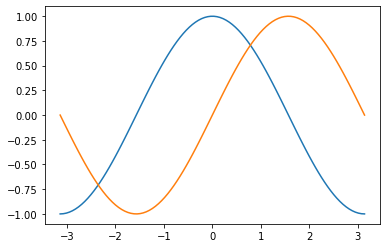

In [2]:
x = np.linspace(-np.pi, np.pi, 100)

C, S = np.cos(x), np.sin(x)

plt.plot(x, C)
plt.plot(x, S);

#### Exercise - 1 

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7

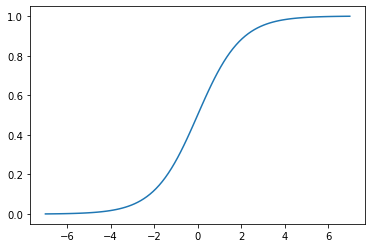

In [3]:
X = np.linspace(-7, 7, 100)
f = np.exp(X) / (1 + np.exp(X))

plt.plot(X, f)

plt.show() # this can be used for some cases but generally it is not mandatory and python can plot anything without this order

### Scatter Plots

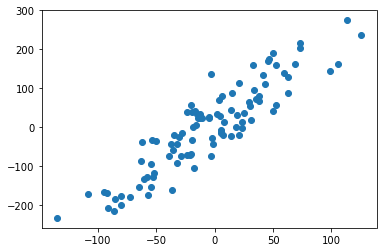

In [4]:
X = np.random.randn(100) * 50
Y = 20 + 2 * X

# Here we are using a random noise ("jitter") added over the 
# Y Series in order to get some noisier, more real-looking generated data.

jitter = 50 * np.random.randn(100)
Y_randomized = Y + jitter

plt.scatter(X, Y_randomized)

When we try to plot this we get an unusable graph.

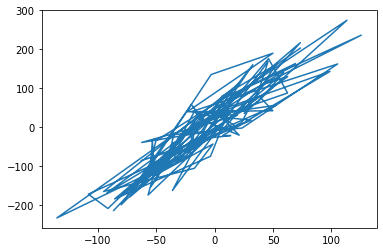

In [5]:
plt.plot(X,Y_randomized)

#### Exercise - 2

Let's draw a circle using a scatter plot, afterwards fill it.

$$r^2 = sen(\phi)^2 + cos(\phi)^2$$

$$x=r \cdot cos(\phi)$$
$$y=r \cdot sin(\phi)$$

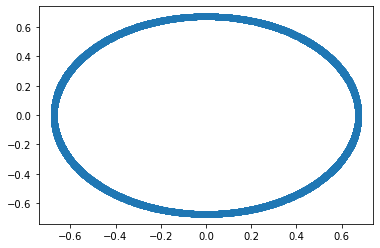

In [6]:
angle = 2 * np.pi * np.random.random(5000)
radius = np.sqrt(np.random.random())

X = radius * np.cos(angle)
Y = radius * np.sin(angle)

plt.scatter(X,Y);

### Bar plots



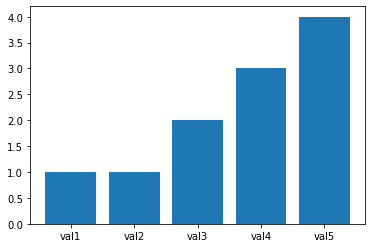

In [8]:
x = [ 1, 1, 2, 3, 4]
y = ['val1', 'val2', 'val3', 'val4', 'val5']

plt.bar(range(len(x)), x)
plt.xticks(np.arange(len(x)), y);

Horizontal bar plots are just the same but using barh instead of bar.

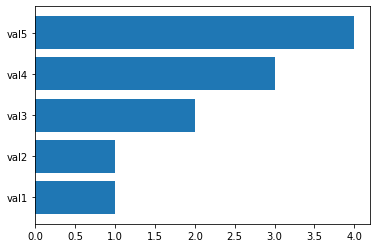

In [18]:
x = [ 1, 1, 2, 3, 4]
y = ['val1', 'val2', 'val3', 'val4', 'val5']

plt.barh(range(len(x)), x)
plt.yticks(np.arange(len(x)), y);

### Histogram



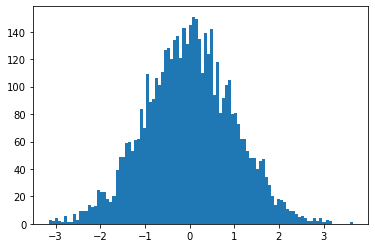

In [27]:
x_normal = np.random.normal(size=5000)

plt.hist(x_normal, bins=100) 
plt.show()

Density parameter normalizes the histogram and makes it easier to compare with other normalized data

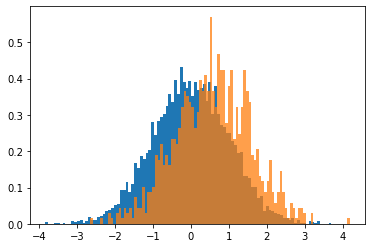

In [31]:
x_normal = np.random.normal(size=6000)
x_normal2 = np.random.normal(size=1000)+0.5

plt.hist(x_normal, bins=100, density=True) 
plt.hist(x_normal2, bins=100, density=True, alpha=0.75)
plt.show()

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.
Is the object that keeps the whole image output.

### Artists

They are the things we can find inside the "axes" (not axis)

An `Axes` is a single panel of a figure. 

An `Axes` contains generally 2, but sometimes 3, `Axis` of a single plot.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.


<Figure size 432x288 with 0 Axes>

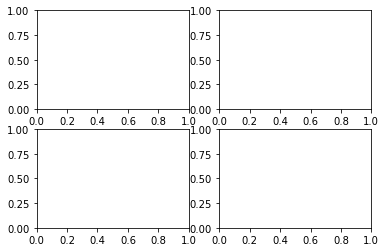

In [10]:
fig = plt.figure()
fig, ax =plt.subplots(2, 2)

### Recommended interface for our plotting functions

In case we need to plt a lot oo things in the same way the recommended way is to define a functin for plotting

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

Sharing axis

In [11]:
X = np.random.randn(100) * 50
Y = 20 + 2 * X

jitter = 50 * np.random.randn(100)
Y_randomized = Y + jitter

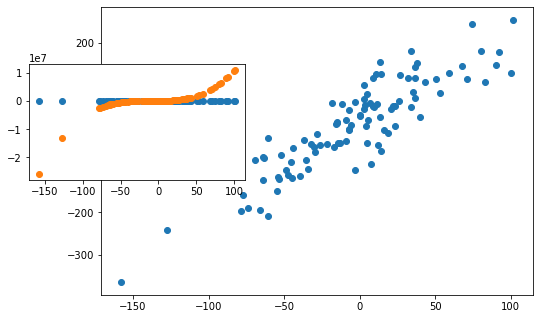

In [27]:
figure = plt.figure(figsize=(10, 8)) # we define the figure
# first eleent of the figure, a main scatter plot
axes = figure.add_axes([0.2, 0.4, 0.6, 0.5]) # 'x0', 'y0' (position within the figure), 'width', and 'height'
axes.scatter(X, Y_randomized)
# second element of he figure, a second scatter plot on top pof the first
axes2 = figure.add_axes([0.1, 0.6, 0.3, 0.2]) # 'x0', 'y0' (position within the figure), 'width', and 'height'
axes2.scatter(X, Y**2)
axes2.scatter(X, Y**3);

### Subplots

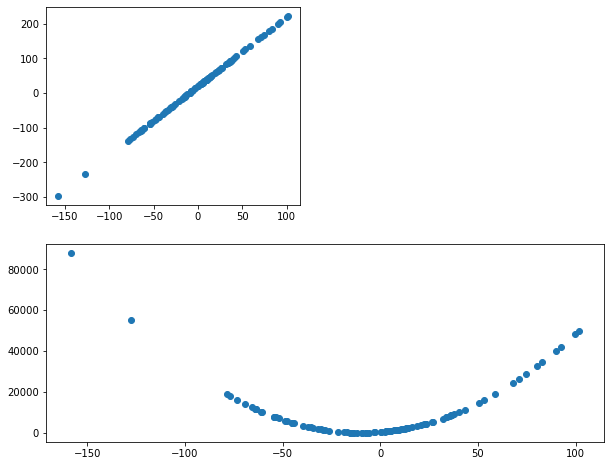

In [28]:
figure = plt.figure(figsize=(10, 8))

subplot_1 = figure.add_subplot(2, 2, 1)
subplot_1.scatter(X, Y)

subplot_2 = figure.add_subplot(2, 1, 2)
subplot_2.scatter(X, Y**2)

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

<class 'numpy.ndarray'> (2, 2)


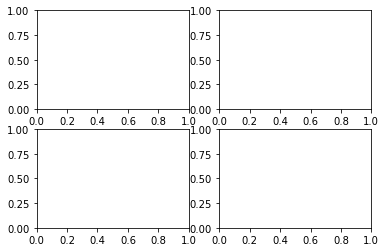

In [29]:
fig,ax=plt.subplots(2,2)
print(type(ax),ax.shape)

In [ ]:
x = np.linspace(-2, 2, 100)

fig, ax = plt.subplots(figsize=(10, 8))
ax2 = ax.twinx()
ax.plot(x, 2*x)
ax2.plot(x, np.log(x))

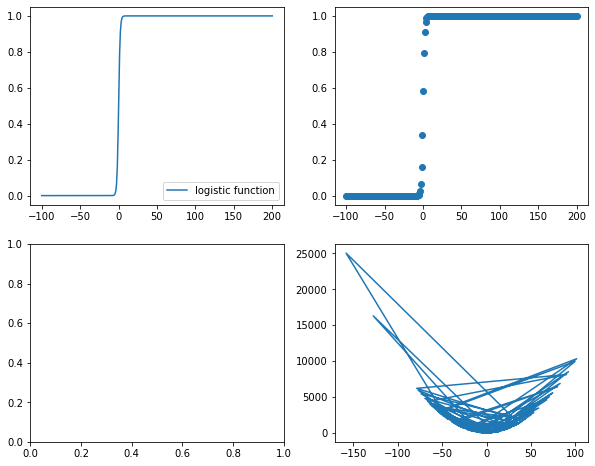

In [30]:
fig, axes= plt.subplots(2, 2, figsize=(10,8))

x = np.linspace(-100, 200, 300)
y = 1 / (1 + np.exp(-x))

axes[0, 0].plot(x, y)
axes[0, 1].scatter(x, y)
axes[1, 1].plot(X, X**2)


axes[0, 0].legend(['logistic function'])

### Sharing axis

<ipython-input-38-99f3cf4947ea>:6: RuntimeWarning: invalid value encountered in log
  ax[0, 0].plot(X, np.log(X))


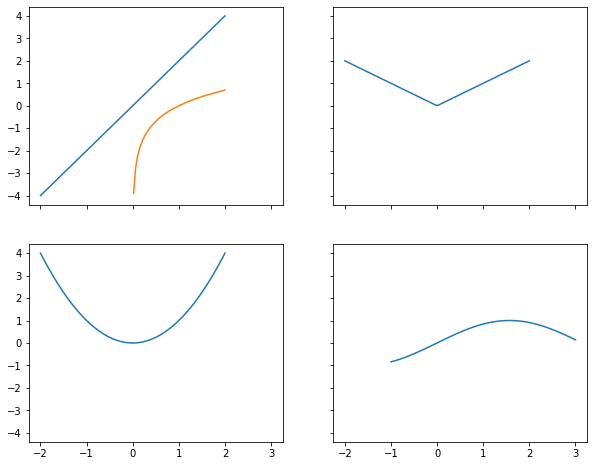

In [38]:
X = np.linspace(-2, 2, 100)

fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True) #sharing ais attrs

ax[0, 0].plot(X, 2*X)
ax[0, 0].plot(X, np.log(X))

ax[0, 1].plot(X, np.abs(X))


ax[1, 0].plot(X, X**2)

ax[1, 1].plot(X + 1, np.sin(X + 1))

plt.show()

<ipython-input-39-fba09243a110>:7: RuntimeWarning: invalid value encountered in log
  ax2.plot(X, np.log(X))


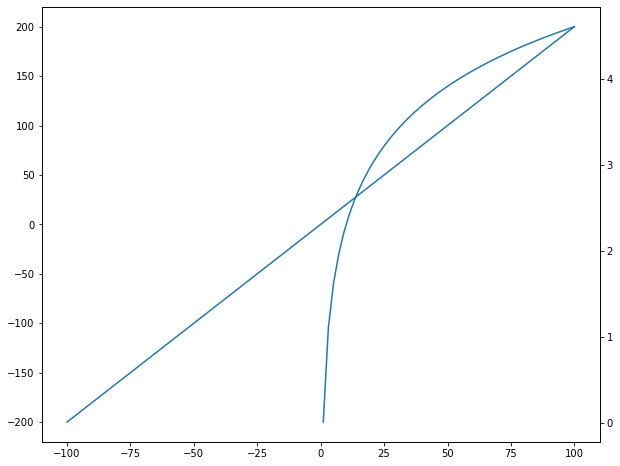

In [39]:
X = np.linspace(-100, 100, 100)

fig, ax = plt.subplots(figsize=(10, 8))

ax2 = ax.twinx() # telling the figure both share only X
ax.plot(X, 2*X)
ax2.plot(X, np.log(X))

### fill_between

We can fill areas of the plot with solid color with `plt.fill_between(x, y1, y2)`

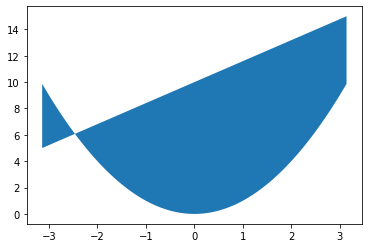

In [40]:
X = np.linspace(-np.pi, np.pi, 250)
Y1 = np.linspace(5, 15, 250)
Y2 = X**2
plt.fill_between(X, Y1, Y2)



If we indicate it we can fill areas of the plot with solid color differently in different parts of the graph with `fill_between`(`where=`)

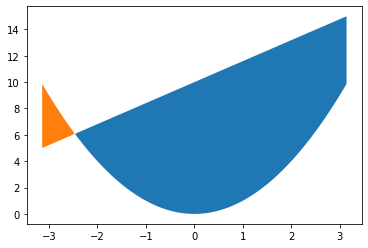

In [41]:
X=np.linspace(-np.pi,np.pi,250)
Y1=np.linspace(5,15,250)
Y2=X**2
plt.fill_between(X,Y1,Y2,where=Y1>Y2)
plt.fill_between(X,Y1,Y2,where=Y1<Y2)

### Exercise

Reproduce a plot given a code.

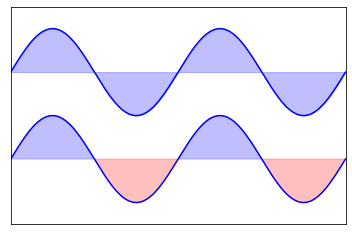

In [43]:
# code
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
#end of code

plt.fill_between(X, 1, Y+1, color='blue', alpha=.25)

plt.fill_between(X, -1, Y-1, where=(Y-1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y-1, where=(Y-1) < -1, color='red', alpha=.25)

plt.xlim(-np.pi, np.pi)
plt.xticks([])

plt.ylim(-2.5, 2.5)
plt.yticks([]);

## Line properties

### Colour

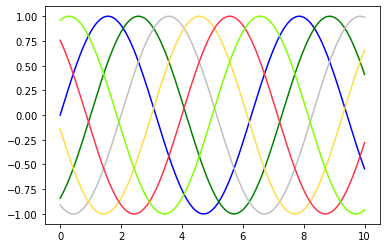

In [45]:
X = np.linspace(0, 10, 1000)

plt.plot(X, np.sin(X-0), color='blue')
plt.plot(X, np.sin(X-1), color='g') #rgbcmyk
plt.plot(X, np.sin(X-2), color='0.75')
plt.plot(X, np.sin(X-3), color='#FFDD44') #Hex code
plt.plot(X, np.sin(X-4), color=(1, 0.2, 0.3)) # RGB tuple 0-1
plt.plot(X, np.sin(X-5), color='chartreuse') #HTML

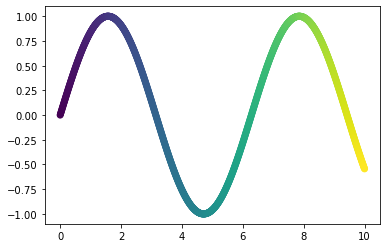

In [46]:
from matplotlib import cm

cmap=cm.get_cmap('viridis')


X=np.linspace(0,10,1000)
Y=np.sin(X-0)
plt.scatter(X,Y,c=X,cmap=cmap)

#### Exercise

Given a code, try to reproduce the graphic taking care of marker size, color and transparency.

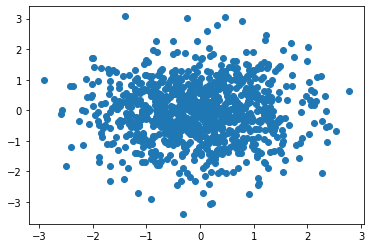

In [47]:
#code 
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)

plt.scatter(X, Y)
#end of code

([], [])

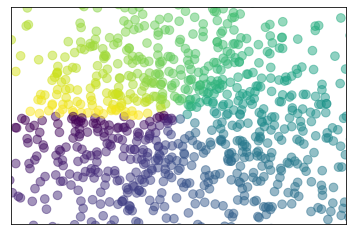

In [48]:
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)
cmap = cm.get_cmap('viridis')

plt.scatter(X, Y, c=T, cmap=cmap, s=75, alpha=.5)
plt.xlim(-1.5, 1.5)
plt.xticks([])
plt.ylim(-1.5, 1.5)
plt.yticks([])

### Markers and linestyles

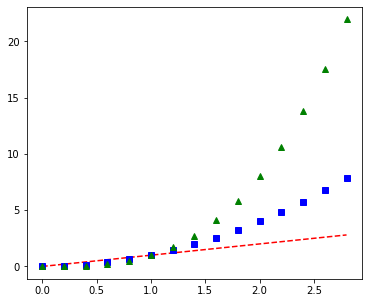

In [50]:
fig, ax = plt.subplots(figsize=(6, 5))

X = np.arange(0, 3, 0.2)
Y1 = X
Y2 = X**2
Y3 = X**3

#ax.plot(X,Y1,'r--')
ax.plot(X, Y1, color='red', linestyle='--')
#ax.plot(X,Y2,'bs')
ax.plot(X, Y2, color='blue', marker='s', linestyle='')
ax.plot(X, Y3, color='green', marker='^', linestyle='')

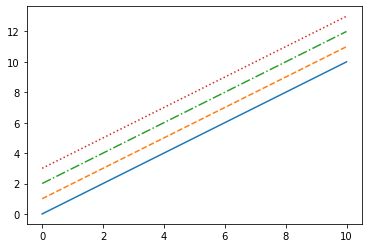

In [56]:
x = np.linspace(0, 10, 100)
plt.plot(x, x+0, linestyle='solid')
plt.plot(x, x+1, linestyle='dashed')
# plt.plot(x, x+2, linestyle='dashdot')
plt.plot(x, x+2, linestyle='-.')
plt.plot(x, x+3, linestyle='dotted')

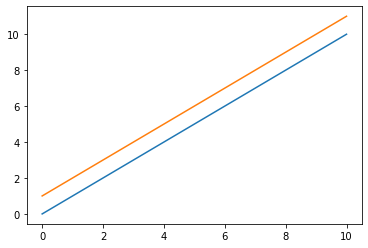

In [55]:
#tableau colors
X = np.linspace(0, 10, 100)
plt.plot(X, X+0, linestyle='solid', color='tab:blue')
plt.plot(X, X+1, linestyle='solid', color='tab:orange')

## Histograms

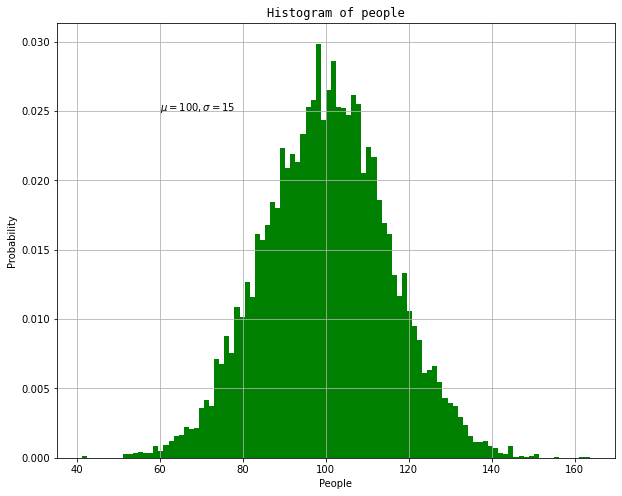

In [62]:
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)

fig, ax = plt.subplots(figsize=(10, 8));

ax.hist(x, bins=100, density=True, color='green');

ax.set_xlabel('People')
ax.set_ylabel('Probability');
ax.set_title('Histogram of people', fontfamily='monospace'); # we can select font
ax.text(60,.025,'$\mu=100,\sigma=15$') # we can add a tex inside the graph
ax.grid()

## Legends

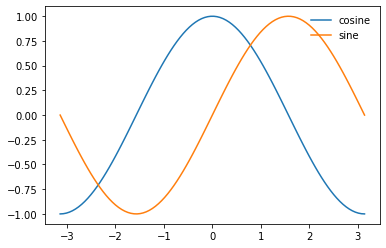

In [66]:
X = np.linspace(-np.pi, np.pi, 100)
C = np.cos(X)
S = np.sin(X)


plt.plot(X, C, label='cosine')
plt.plot(X, S, label='sine')

plt.legend(loc='upper right', frameon=False)
plt.show()

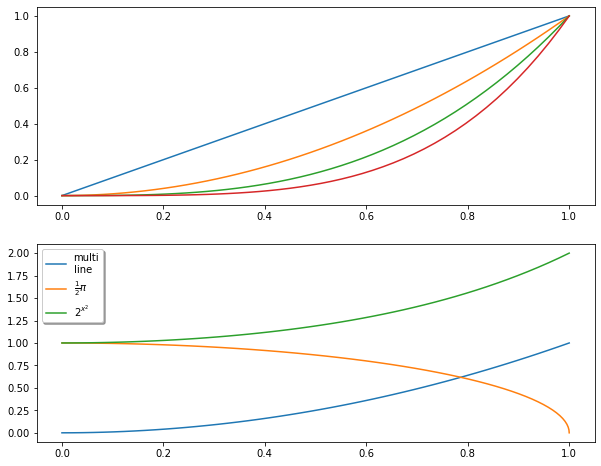

In [67]:
x = np.linspace(0, 1)
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8))

for n in range(1, 5):
  ax0.plot(x, x**n)


ax1.plot(x, x**2, label='multi\nline')
half_pi = np.linspace(0, np.pi/2)
ax1.plot(np.sin(half_pi), np.cos(half_pi), label=r'$\frac{1}{2}\pi$')
ax1.plot(x, 2**(x**2), label='$2^{x^2}$')
ax1.legend( shadow=True, fancybox=True)

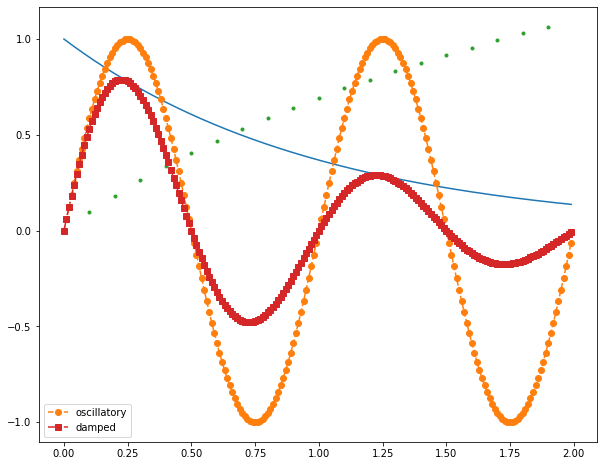

In [68]:
t1 = np.arange(0, 2, 0.1)
t2 = np.arange(0, 2, 0.01)

fig, ax = plt.subplots(figsize=(10, 8))

l1, = ax.plot(t2, np.exp(-t2), label='weight')
l2, = ax.plot(t2, np.sin(2*np.pi*t2), linestyle='--', color='tab:orange', marker='o', label='oscillatory')
l3, = ax.plot(t1, np.log(1+t1), color='tab:green', linestyle='', marker='.', label='log')
l4, = ax.plot(t2, np.exp(-t2)*np.sin(2*np.pi*t2), linestyle='-.', marker='s', color='tab:red', label='damped')


ax.legend((l2, l4),('oscillatory', 'damped')); # we can select to show legend of only some series

### Styles

In [69]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

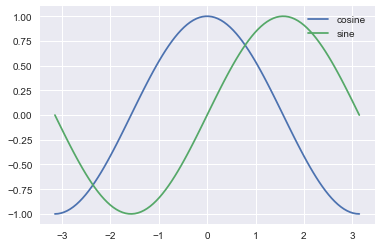

In [71]:
plt.style.use('seaborn') # selecting the style with `plt.style.use`


X = np.linspace(-np.pi, np.pi, 100)
C = np.cos(X)
S = np.sin(X)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(X, C, label='cosine');
ax.plot(X, S, label='sine');

ax.legend(loc='upper right', frameon=False)

### Tick, labels and limits

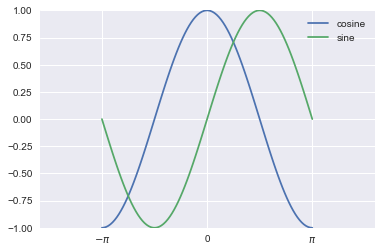

In [72]:
X = np.linspace(-np.pi, np.pi, 100)
C = np.cos(X)
S = np.sin(X)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(X, C, label='cosine');
ax.plot(X, S, label='sine');
ax.set_xticks([X[0], 0, X[-1]])
ax.set_xticklabels(['$-\pi$', '0', '$\pi$']) 

ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)

ax.legend(loc='upper right', frameon=False);

## Scales

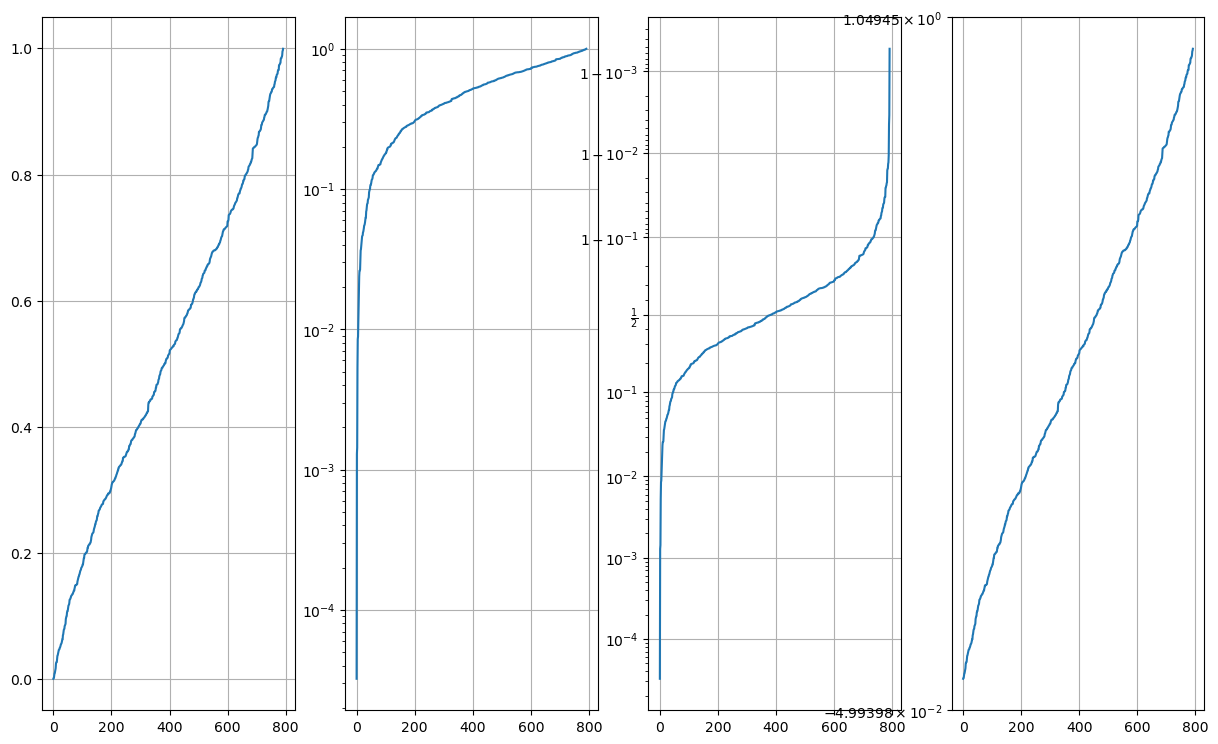

In [82]:
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]

y.sort()
x = np.arange(len(y))

fig,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 9))


ax1.plot(x, y)
ax1.grid()
ax2.plot(x, y)
ax2.set_yscale('log') # changing the scale to logarithmic
ax2.grid()

plt.style.use('default')

ax3.plot(x, y)
ax3.set_yscale('logit')
ax3.grid()
ax4.plot(x, y)
ax4.set_yscale('symlog')
ax4.grid()
